In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
f=open("result_windows.json",'r')
jsondata=json.load(f)
f.close()

In [3]:
df=pd.DataFrame(jsondata,index=['count','mitigation'])
df=df.T

In [4]:
df.head()

,count,mitigation
T1015,5,[Execution Prevention: Adversaries can replace...
T1003,36,[Active Directory Configuration: Manage the ac...
T1001,2,[Network Intrusion Prevention: Network intrusi...
T1190,3,[Application Isolation and Sandboxing: Applica...
T1076,17,[Audit: Audit the Remote Desktop Users group m...


In [5]:
for i in jsondata.keys():
    jsondata[i]['mitigation']="\n\n\n".join(jsondata[i]['mitigation'])

In [6]:
df2=pd.DataFrame(jsondata.values(),columns=['count','mitigation'])

In [7]:
df2.head()

,count,mitigation
0,5,Execution Prevention: Adversaries can replace ...
1,36,Active Directory Configuration: Manage the acc...
2,2,Network Intrusion Prevention: Network intrusio...
3,3,Application Isolation and Sandboxing: Applicat...
4,17,Audit: Audit the Remote Desktop Users group me...


In [8]:
df3=pd.DataFrame()

In [9]:
df3['id']=jsondata.keys()
df3['count']=df2['count']
df3['mitigation']=df2['mitigation']


In [10]:
pd.set_option('display.max.colwidth',2000)

In [11]:
from IPython.display import display, HTML

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

In [12]:
df3=df3.sort_values(by='count',ascending=False)

In [17]:
pretty_print(df3)

,id,count,mitigation
15,T1064,41,"Application Isolation and Sandboxing: Configure Office security settings enable Protected View, to execute within a sandbox environment, and to block macros through Group Policy. Other types of virtualization and application microsegmentation may also mitigate the impact of compromise.Disable or Remove Feature or Program: Turn off unused features or restrict access to scripting engines such as VBScript or scriptable administration frameworks such as PowerShell."
20,T1193,37,"Antivirus/Antimalware: Anti-virus can also automatically quarantine suspicious files.Network Intrusion Prevention: Network intrusion prevention systems and systems designed to scan and remove malicious email attachments can be used to block activity.Restrict Web-Based Content: Block unknown or unused attachments by default that should not be transmitted over email as a best practice to prevent some vectors, such as .scr, .exe, .pif, .cpl, etc. Some email scanning devices can open and analyze compressed and encrypted formats, such as zip and rar that may be used to conceal malicious attachments in Obfuscated Files or Information.User Training: Users can be trained to identify social engineering techniques and spearphishing emails."
21,T1204,37,"Execution Prevention: Application whitelisting may be able to prevent the running of executables masquerading as other files.Network Intrusion Prevention: If a link is being visited by a user, network intrusion prevention systems and systems designed to scan and remove malicious downloads can be used to block activity.Restrict Web-Based Content: If a link is being visited by a user, block unknown or unused files in transit by default that should not be downloaded or by policy from suspicious sites as a best practice to prevent some vectors, such as .scr, .exe, .pif, .cpl, etc. Some download scanning devices can open and analyze compressed and encrypted formats, such as zip and rar that may be used to conceal malicious files in Obfuscated Files or Information.User Training: Use user training as a way to bring awareness to common phishing and spearphishing techniques and how to raise suspicion for potentially malicious events."
1,T1003,36,"Active Directory Configuration: Manage the access control list for ""Replicating Directory Changes"" and other permissions associated with domain controller replication.[20][21]Credential Access Protection: With Windows 10, Microsoft implemented new protections called Credential Guard to protect the LSA secrets that can be used to obtain credentials through forms of credential dumping. It is not configured by default and has hardware and firmware system requirements. It also does not protect against all forms of credential dumping.[18][19]Operating System Configuration: Consider disabling or restricting NTLM.[23]Password Policies: Ensure that local administrator accounts have complex, unique passwords across all systems on the network.Privileged Account Management: Windows:Do not put user or admin domain accounts in the local administrator groups across systems unless they are tightly controlled, as this is often equivalent to having a local administrator account with the same password on all systems. Follow best practices for design and administration of an enterprise network to limit privileged account use across administrative tiers.Privileged Process Integrity: On Windows 8.1 and Windows Server 2012 R2, enable Protected Process Light for LSA.[22]User Training: Limit credential overlap across accounts and systems by training users and administrators not to use the same password for multiple accounts."
41,T1086,36,"Code Signing: Set PowerShell execution policy to execute only signed scripts.Disable or Remove Feature or Program: It may be possible to remove PowerShell from systems when not needed, but a review should be performed to assess the impact to an environment, since it could be in use for many legitimate purposes and administrative function

In [14]:
df=df.sort_values(by='count',ascending=False)

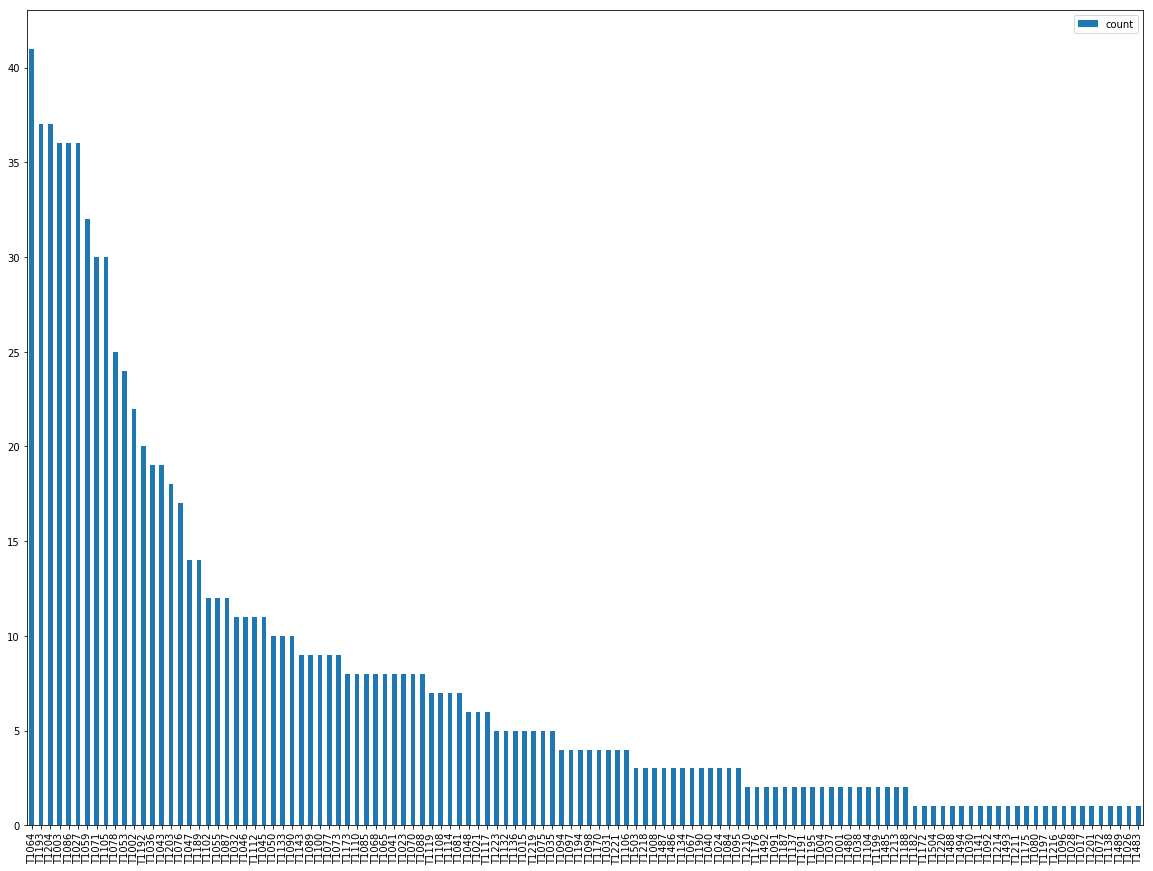

In [16]:
df.plot(kind='bar',figsize=(20,15))